#### CPU usage analysis during LLM inference

In [116]:
from matplotlib.ticker import MultipleLocator
from matplotlib import pyplot as plt

import pandas as pd

path = '/Users/tharindu/Library/CloudStorage/OneDrive-TheUniversityofMelbourne/phd-student/projects/dynamic-affinity/simulations/parsed_data.csv'
df = pd.read_csv(path)

code_df = df[df['kind'] == 'code']
conv_df = df[df['kind'] == 'conv']

plt.rcParams.update({'font.size': 11})


def plot_metrics(df, title):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 6))
    #fig.tight_layout(pad=5.0)

    cols = ['technique', 'rate',
            'ttft_times_p90', 'tbt_times_p90', 'response_times_p90',
            'core_wttf_cv_p90', 'cluster_energy_j', 'cpu_tasks_throughput_p90'
            #, 'cpu_tasks_throughput_max'
            ]

    col_names = {
        'ttft_times_p90': 'p90 TTFT',
        'tbt_times_p90': 'p90 TBT',
        'response_times_p90': 'p90 E2E',
        'core_wttf_cv_p90': 'p90 WTTF CV',
        'cluster_energy_j': 'p90 Energy(J)',
        'cpu_tasks_throughput_p90': 'p90 Tasks Count',
    }

    df = df[cols]
    df = df[df['rate'] <= 150]

    # Plot each metric as a separate subplot
    plot_count = 0
    for i, col in enumerate(df.columns[2:]):
        plot_count += 1
        subplot_df = df[['rate', 'technique', col]]
        subplot_df.set_index('rate', inplace=True)
        subplot_df = subplot_df.sort_values(by='rate')
        row = int(i / 3)
        current_ax = axs[int(i / 3)][i % 3]
        for technique, group in subplot_df.groupby('technique'):
            is_cpu_metric = row > 0
            group.plot(y=col, ax=current_ax, grid=True, marker='o', markersize=7, markeredgewidth=4)
            current_ax.set_ylabel(col_names[col])
            current_ax.set_xlabel('Request Rate (req/s)')
            current_ax.legend('')
            current_ax.set_xlim(left=24)
            current_ax.xaxis.set_major_locator(MultipleLocator(10))

    plt.tight_layout()
    #plt.title(title)
    plt.show()


Observe the cluster for the coding trace

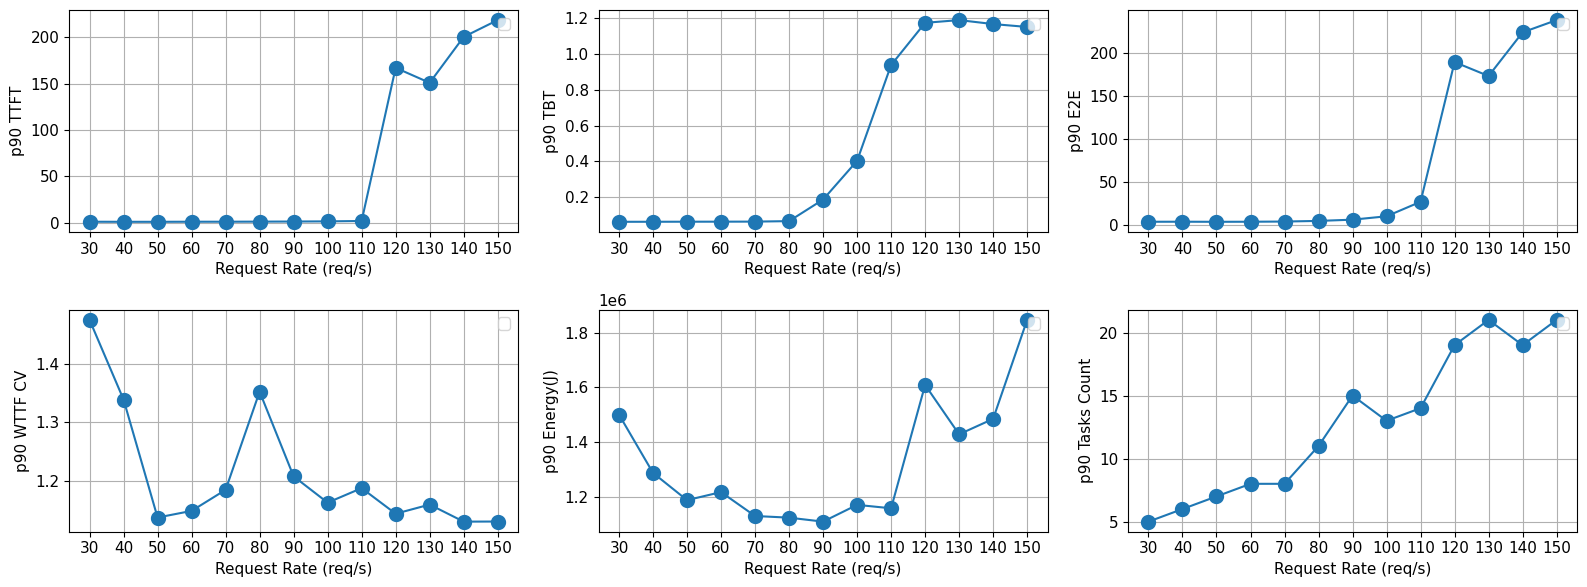

In [117]:
plot_metrics(df=code_df, title="Code trace")

Observer the cluster for the conversation trace

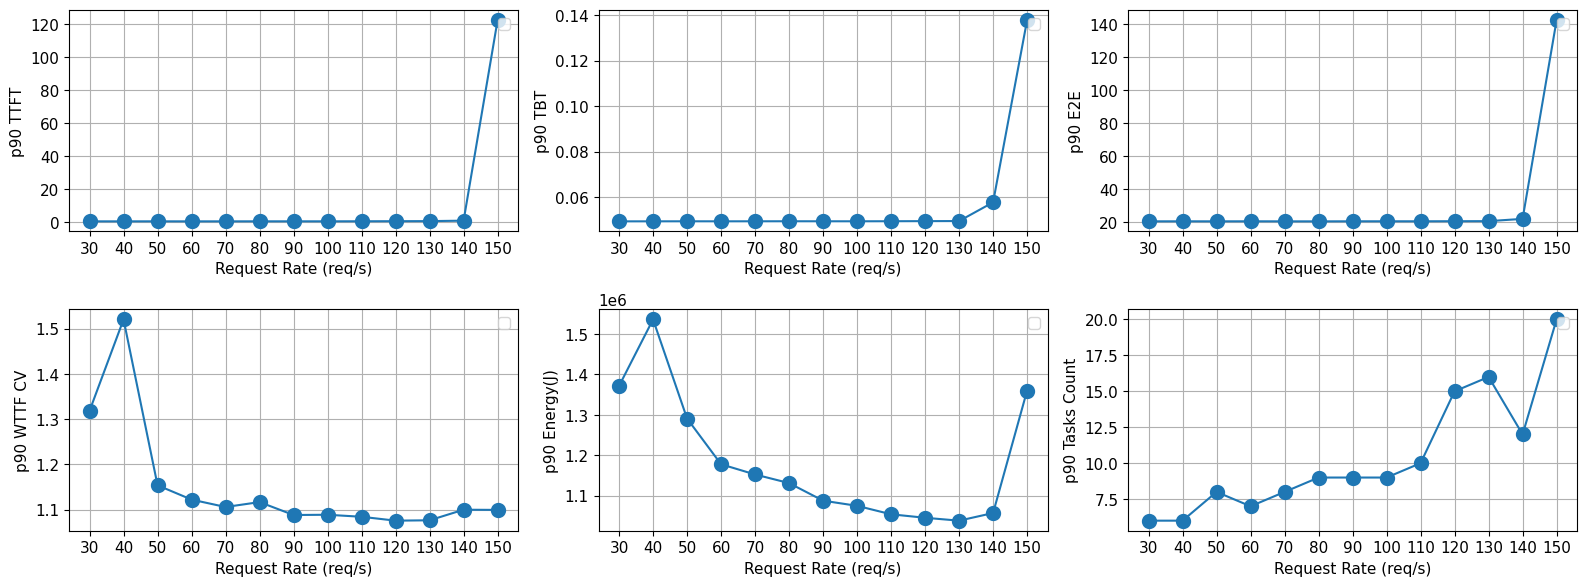

In [118]:
plot_metrics(df=conv_df, title="Conv trace")
#plot_metrics(df=conv_df)